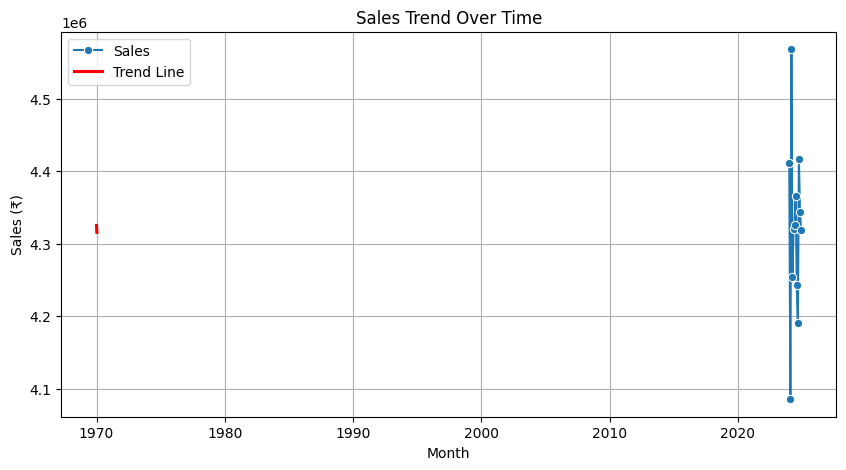

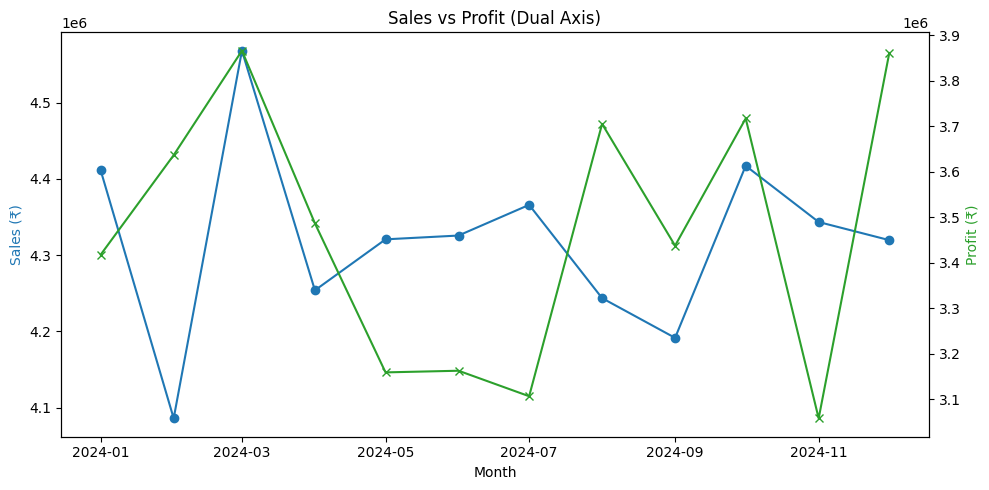

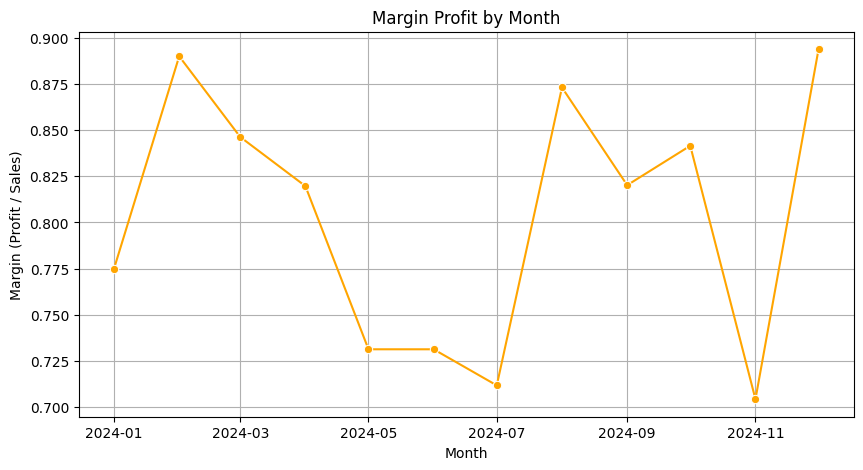

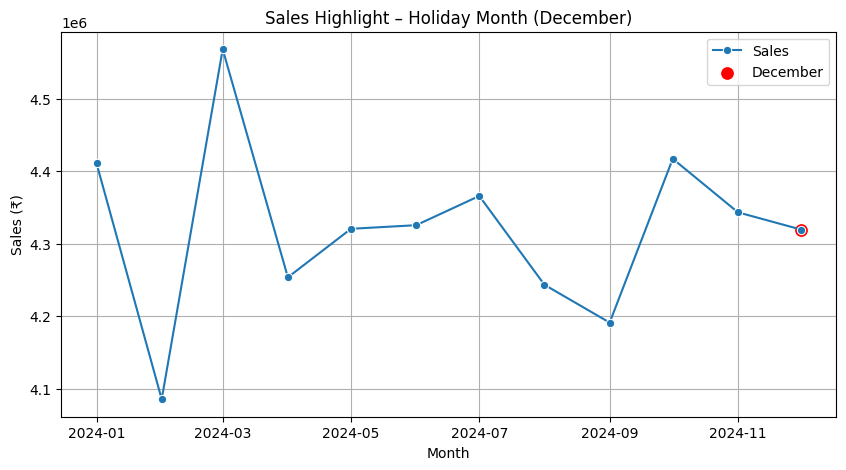

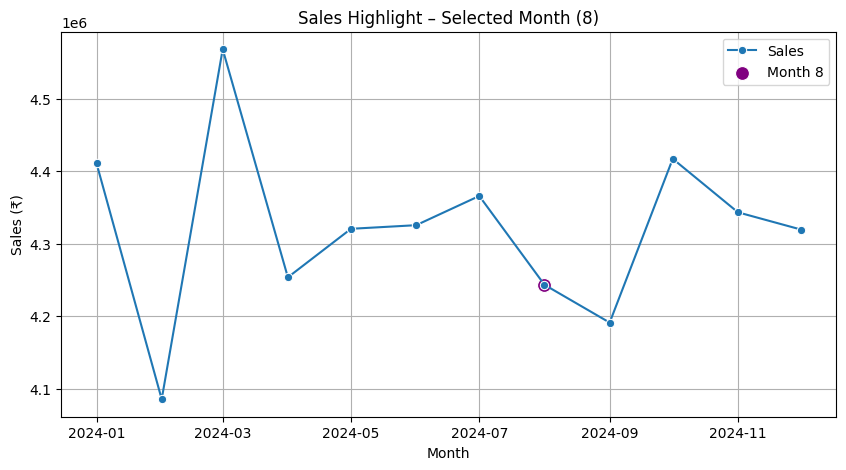

=== Monthly Summary (Sales, Profit, Margin) ===
        Month      Sales      Profit  Margin
0  2024-01-01  4411069.0  3418172.76    0.77
1  2024-02-01  4085790.0  3636936.80    0.89
2  2024-03-01  4568188.0  3866508.79    0.85
3  2024-04-01  4253789.0  3486965.67    0.82
4  2024-05-01  4320679.0  3159296.59    0.73
5  2024-06-01  4325660.0  3162917.85    0.73
6  2024-07-01  4365923.0  3106863.82    0.71
7  2024-08-01  4243509.0  3705581.55    0.87
8  2024-09-01  4191393.0  3437876.95    0.82
9  2024-10-01  4417170.0  3717554.39    0.84
10 2024-11-01  4343395.0  3058257.82    0.70
11 2024-12-01  4319618.0  3861660.61    0.89


In [2]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load Dataset
file_path = '/content/ncr_ride_bookings.csv'
data = pd.read_csv(file_path)

# ✅ Preprocessing
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data['Month'] = data['Date'].dt.to_period('M').dt.to_timestamp()

# Clean numeric column
data['Booking Value'] = pd.to_numeric(data['Booking Value'], errors='coerce')

# ✅ Aggregate sales by month
monthly_sales = data.groupby('Month', as_index=False)['Booking Value'].sum()
monthly_sales.rename(columns={'Booking Value': 'Sales'}, inplace=True)

# ✅ Simulate profit (70–90% of sales)
np.random.seed(42)
monthly_sales['Profit'] = monthly_sales['Sales'] * np.random.uniform(0.7, 0.9, len(monthly_sales))
monthly_sales['Margin'] = monthly_sales['Profit'] / monthly_sales['Sales']

# -------------------------------
# 1️⃣ TREND IN SALES
# -------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', label='Sales')
sns.regplot(data=monthly_sales, x=monthly_sales.index, y='Sales', scatter=False, ci=None, color='red', label='Trend Line')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales (₹)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 2️⃣ SALES vs PROFIT (Dual Axis)
# -------------------------------
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(monthly_sales['Month'], monthly_sales['Sales'], color='tab:blue', marker='o', label='Sales')
ax2.plot(monthly_sales['Month'], monthly_sales['Profit'], color='tab:green', marker='x', label='Profit')

ax1.set_xlabel('Month')
ax1.set_ylabel('Sales (₹)', color='tab:blue')
ax2.set_ylabel('Profit (₹)', color='tab:green')
plt.title('Sales vs Profit (Dual Axis)')
fig.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ MARGIN PROFIT TREND
# -------------------------------
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Margin', marker='o', color='orange')
plt.title('Margin Profit by Month')
plt.xlabel('Month')
plt.ylabel('Margin (Profit / Sales)')
plt.grid(True)
plt.show()

# -------------------------------
# 4️⃣ HIGHLIGHT HOLIDAY MONTH (December)
# -------------------------------
monthly_sales['Holiday'] = monthly_sales['Month'].dt.month == 12

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', label='Sales')
sns.scatterplot(data=monthly_sales[monthly_sales['Holiday']], x='Month', y='Sales',
                color='red', s=100, label='December')
plt.title('Sales Highlight – Holiday Month (December)')
plt.xlabel('Month')
plt.ylabel('Sales (₹)')
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 5️⃣ DYNAMIC MONTH HIGHLIGHT (Choose Any Month)
# -------------------------------
highlight_month = 8  # Example: August
monthly_sales['Highlight'] = monthly_sales['Month'].dt.month == highlight_month

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', label='Sales')
sns.scatterplot(data=monthly_sales[monthly_sales['Highlight']], x='Month', y='Sales',
                color='purple', s=100, label=f'Month {highlight_month}')
plt.title(f'Sales Highlight – Selected Month ({highlight_month})')
plt.xlabel('Month')
plt.ylabel('Sales (₹)')
plt.legend()
plt.grid(True)
plt.show()

# ✅ Display Summary Table
print("=== Monthly Summary (Sales, Profit, Margin) ===")
print(monthly_sales[['Month', 'Sales', 'Profit', 'Margin']].round(2))


In [4]:
data.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Month
count,150000,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000,150000
mean,2024-06-30 16:42:40.320000,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584,2024-06-16 01:12:18.432000
min,2024-01-01 00:00:00,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000,2024-01-01 00:00:00
25%,2024-03-31 00:00:00,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000,2024-03-01 00:00:00
50%,2024-07-01 00:00:00,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000,2024-07-01 00:00:00
75%,2024-09-30 00:00:00,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000,2024-09-01 00:00:00
max,2024-12-30 00:00:00,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000,2024-12-01 00:00:00
std,NaN,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819,NaN
